In [17]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 13,6

df = pd.read_csv('RUvideos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40739 entries, 0 to 40738
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40739 non-null  object
 1   trending_date           40739 non-null  object
 2   title                   40739 non-null  object
 3   channel_title           40739 non-null  object
 4   category_id             40739 non-null  int64 
 5   publish_time            40739 non-null  object
 6   tags                    40739 non-null  object
 7   views                   40739 non-null  int64 
 8   likes                   40739 non-null  int64 
 9   dislikes                40739 non-null  int64 
 10  comment_count           40739 non-null  int64 
 11  thumbnail_link          40739 non-null  object
 12  comments_disabled       40739 non-null  bool  
 13  ratings_disabled        40739 non-null  bool  
 14  video_error_or_removed  40739 non-null  bool  
 15  de

In [18]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['video_id'] = df.video_id.astype('string')
df['title'] = df['title'].astype('string')
df['channel_title'] = df['channel_title'].astype('string')
df['tags'] = df['tags'].astype('string')
df['thumbnail_link'] = df['thumbnail_link'].astype('string')
df['description'] = df['description'].astype('string')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13 09:09:31+00:00,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13 17:32:11+00:00,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13 16:11:31+00:00,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13 06:51:10+00:00,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13 16:52:36+00:00,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


<AxesSubplot:title={'center':'Среднее количество просмотров на одно видео по категориям'}, xlabel='category_id', ylabel='Videos'>

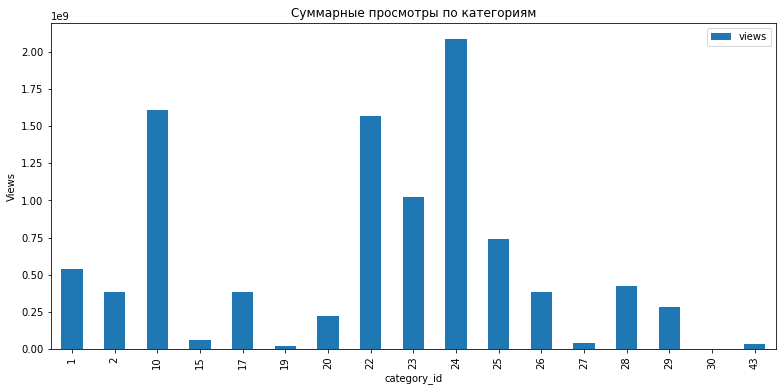

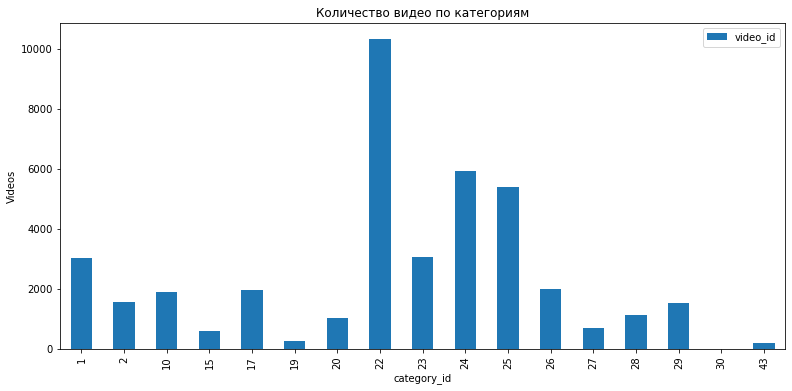

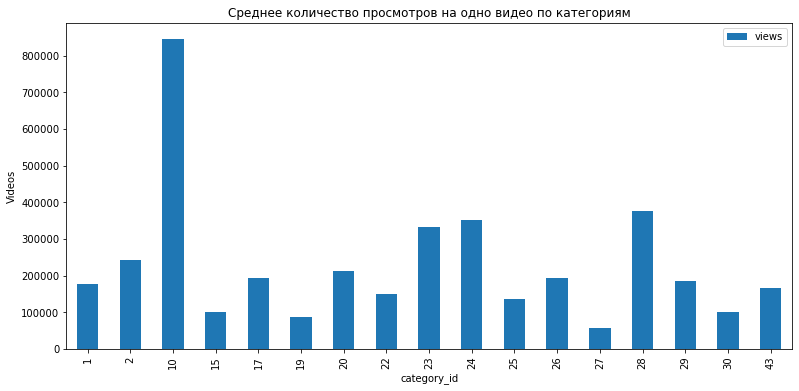

In [19]:
df1 = df[['category_id', 'views']].groupby('category_id').sum()
df2 = df[['category_id', 'video_id']].groupby('category_id').count()
df3 = df[['category_id', 'views']].groupby('category_id').mean()
df1.plot(kind='bar', 
        title='Суммарные просмотры по категориям',
        xlabel='category_id',
        ylabel='Views')
df2.plot(kind='bar', 
        title='Количество видео по категориям',
        xlabel='category_id',
        ylabel='Videos')
df3.plot(kind='bar', 
        title='Среднее количество просмотров на одно видео по категориям',
        xlabel='category_id',
        ylabel='Videos')

#Самые просматриваемые категории(10, 22, 24)
#Самые выпускаемые видео (22, 24, 25)
# При этом среднее количество просмотров на одно видео очень большое у одной категории(10 - music)

<AxesSubplot:title={'center':'Динамика просмотров(с 25 по 45 недели нет данных)'}, xlabel='Номер недели', ylabel='Просмотры'>

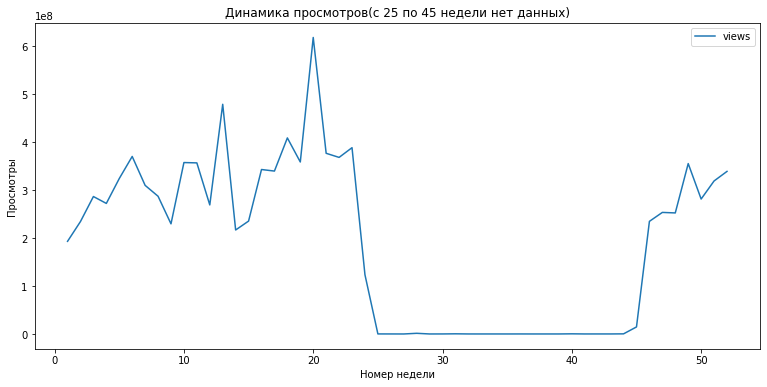

In [25]:
df21 = df
df21['publish_time'] = df['publish_time'].apply(lambda row: row.isocalendar()[1])
df21 = df[['publish_time', 'views']].groupby('publish_time').sum()
df21.plot(title='Динамика просмотров(с 25 по 45 недели нет данных)', 
            xlabel='Номер недели', 
            ylabel='Просмотры')
#Самое большое количество просмотров приходится на 20 неделю

In [26]:
import seaborn as sns

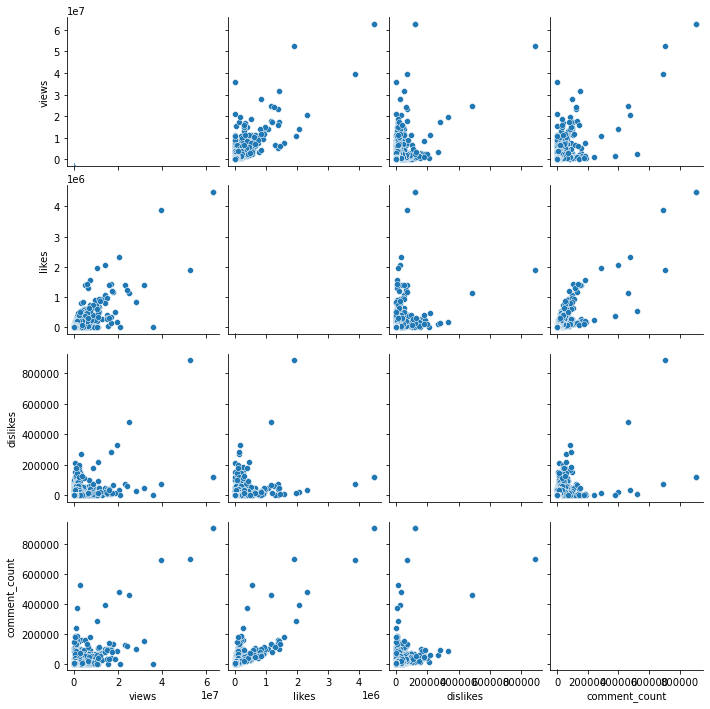

In [28]:
sns.pairplot(df[['views', 'likes', 'dislikes', 'comment_count']])
# Можем предположить, что между просмотрами и лайками есть взаимосвязь, но при этом есть видео с маленьким количеством лайков, но большими просмотрами
# Между просмотрами и дизлайками тоже есть взаимосвязь, но скорее обратная.
# Про просмотры и комментарии ничего нельзя сказать
# Между лайками и дизлайками прослеживается обратная связь
# Между комментариями и лайками тоже есть связь
# Про дизлайки и комментарии не можем ничего сказать

<AxesSubplot:title={'center':'количество выпущенных видео в разрезе вкл/выкл комментариев'}, xlabel='category_id', ylabel='Videos'>

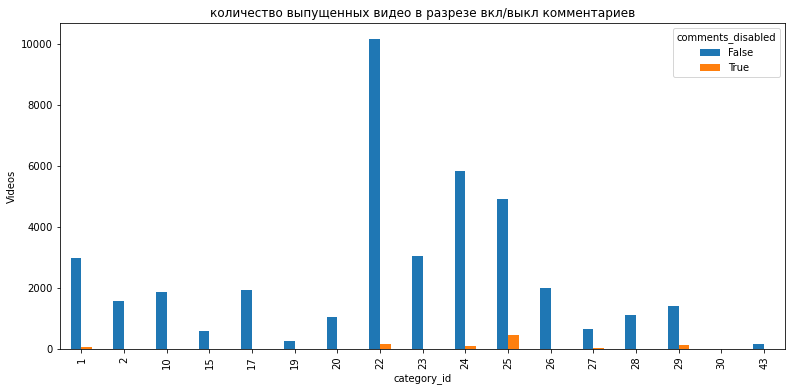

In [40]:
df31 = pd.pivot_table(df, values='views', index=['category_id'],
                    columns=['comments_disabled'], aggfunc=np.count_nonzero)
df31.plot(kind='bar',
          title='количество выпущенных видео в разрезе вкл/выкл комментариев', 
        xlabel='category_id', 
        ylabel='Videos')
#На youtube очень мало видео с выключенными комментариями, но можно заметить, что в категории 25(News & Politics) доля таких выше всего.